# Prediction using Decision Tree

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

### Preprocessing of the data and EDA of the DATA

In [3]:
df =pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.keys()

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
features = df.drop(columns =['Id','Species'])
features

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
f2=np.array(features)

In [7]:
l=df.Species
l=np.array(l)

In [8]:
label = df['Species']
label

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

So becasue the label is in string , we have to change it to numbers :

In [9]:
label_labels=label.unique()
Speciess=np.zeros(shape=(150), dtype=int)
Speciess
for c,i in enumerate(label):
    for j, k in enumerate(label_labels):
        if i==k:
            Speciess[c]=j
Speciess=pd.DataFrame (Speciess, columns=['Specie'])

In [10]:
#Cleaning the data
#concatinating in the labels :
label=pd.concat((label,Speciess), axis=1)
#removing the current the text based labels
label=label.drop(columns =['Species'], axis=1)


In [11]:
l2=np.array(label)


In [12]:
#Still we have to adjust in just one column

array([[<AxesSubplot:xlabel='Id', ylabel='Id'>,
        <AxesSubplot:xlabel='SepalLengthCm', ylabel='Id'>,
        <AxesSubplot:xlabel='SepalWidthCm', ylabel='Id'>,
        <AxesSubplot:xlabel='PetalLengthCm', ylabel='Id'>,
        <AxesSubplot:xlabel='PetalWidthCm', ylabel='Id'>],
       [<AxesSubplot:xlabel='Id', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='PetalWidthCm', ylabel='SepalLengthCm'>],
       [<AxesSubplot:xlabel='Id', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='PetalWidthCm', ylabel='SepalWidthCm'>],
       [<AxesSubplot:xlabel='Id', ylabel='Peta

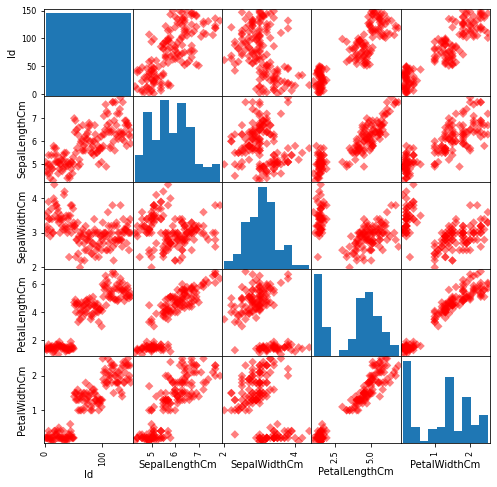

In [13]:
pd.plotting.scatter_matrix(df,c='red',figsize=[8,8], marker='D')

## Creating model and predicting 

In [14]:
#For Prediction we are going to split the data into training and testing data sets
x_train, x_test , y_train, y_test=train_test_split(features, label, test_size=0.1)

In [15]:
model = DecisionTreeClassifier()

In [16]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [20]:
y_pred=model.predict(x_test)

In [21]:
score= accuracy_score(y_test, y_pred)
score

1.0

In [19]:
tree.export_graphviz(model, out_file= 'Tree_graph.dot', 
                     feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], 
                     class_names=sorted(label_labels),
                     label='all',
                     rounded=True,
                     filled=True)

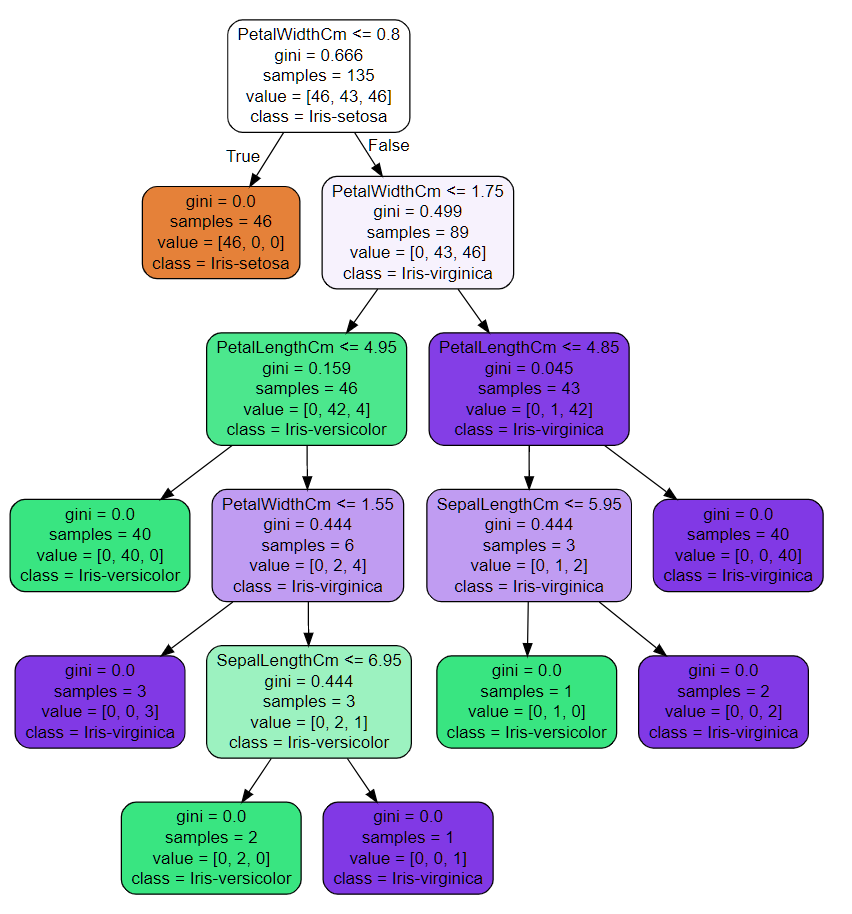